# Air Passengers Prediction using GRU

In this lab, we will use a GRU (Gated Recurrent Unit) neural network to predict the number of airline passengers each month.  
We will:
1. Load the dataset
2. Normalize the data
3. Prepare sequences for GRU input
4. Build and train the GRU model
5. Make predictions and visualize results


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense


##  Load the Dataset

We use the Air Passengers dataset, which contains monthly airline passenger counts from 1949 to 1960.


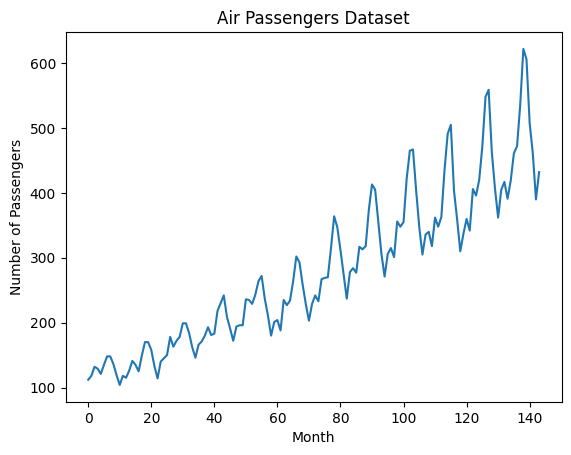

In [ ]:
# Load dataset from URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, usecols=[1])  # 'Passengers' column

# Convert to numpy array
data = df.values.astype('float32')

# Plot the data
plt.plot(data)
plt.title("Air Passengers Dataset")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.show()


##  Normalize the Data

Neural networks work better with data scaled between 0 and 1, so we normalize the passenger numbers.


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)


##  Prepare Sequences for GRU

We use sequences of past 12 months to predict the next month.  
The input shape for GRU is (samples, time_steps, features).


In [ ]:
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 12  # Use past 12 months to predict next month
X, y = create_sequences(data_scaled, time_steps)

print("X shape:", X.shape)  # (samples, time_steps, features)
print("y shape:", y.shape)


X shape: (132, 12, 1)
y shape: (132, 1)


##  Build GRU Model

We create a Sequential model with one GRU layer of 50 units followed by a Dense layer for regression output.


In [ ]:
model = Sequential()
model.add(GRU(50, input_shape=(time_steps, 1)))
model.add(Dense(1))  # Predict next month

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

##  Train the Model

We train the GRU model for 100 epochs using a batch size of 16 and 20% of data for validation.


In [ ]:
history = model.fit(X, y, epochs=100, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0716 - val_loss: 0.1293
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0192 - val_loss: 0.0278
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0146 - val_loss: 0.0217
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - val_loss: 0.0306
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0097 - val_loss: 0.0385
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0101 - val_loss: 0.0323
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0091 - val_loss: 0.0240
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0071 - val_loss: 0.0214
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0066 - val_loss: 0.0206
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0066 - val_loss: 0.0215
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0057 - val_loss: 0.0200
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0059 - val_lo

##  Make Predictions and Visualize

We predict the passenger numbers using the trained model and compare with actual values.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


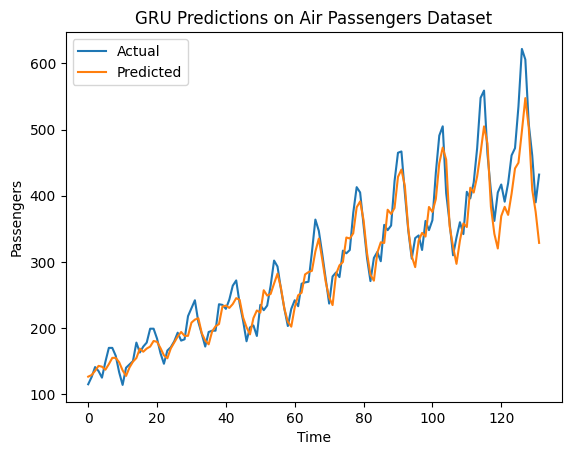

In [ ]:
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y)

plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title("GRU Predictions on Air Passengers Dataset")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()
